In [1]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.decomposition import PCA

In [2]:
# 데이터 불러오기
car = pd.read_csv('cars.csv')
brand = pd.read_csv('brand.csv')

In [3]:
brand

,title,country
0,skoda,Czech Republic
1,vauxhall,United Kingdom
2,hyundai,South Korea
3,mini,United Kingdom
4,ford,United States
5,volvo,Sweden
6,peugeot,France
7,bmw,Germany
8,citroen,France
9,mercedes-benz,Germany


In [4]:
car

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history
0,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN
1,VAUXHALL CORSA,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full
2,HYUNDAI I30,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,NaN
3,MINI HATCH,2395,96731,2010,5.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,Full
4,VAUXHALL CORSA,1000,85000,2013,NaN,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3682,RENAULT MEGANE,1395,76202,2006,4.0,Petrol,Hatchback,1.6L,Manual,5.0,5.0,Euro 4,NaN
3683,AUDI A4,6990,119000,2012,NaN,Petrol,Saloon,2.0L,Manual,4.0,5.0,Euro 5,NaN
3684,BMW 3 SERIES,3995,139000,2013,NaN,Diesel,Saloon,2.0L,Manual,4.0,5.0,Euro 5,NaN
3685,HONDA ACCORD,1390,179190,2007,NaN,Diesel,Estate,2.2L,Manual,5.0,5.0,Euro 4,Full


In [5]:
# title의 앞 부분을 공백 기준으로 split 후 0번째 인덱스의 값을 가지고 온 다음
# 소문자로 바꿔주면 brand의 title과 같은 값을 가질 수 있다
# 이를 brand title이라는 새로운 컬럼으로 추가한다
car['brand title'] = car['title'].str.split(expand=True)[0].str.lower()

In [6]:
# brand의 title 컬럼을 brand title로 변경
brand.rename({'title': 'brand title'}, axis=1, inplace=True)

In [7]:
brand

,brand title,country
0,skoda,Czech Republic
1,vauxhall,United Kingdom
2,hyundai,South Korea
3,mini,United Kingdom
4,ford,United States
5,volvo,Sweden
6,peugeot,France
7,bmw,Germany
8,citroen,France
9,mercedes-benz,Germany


In [8]:
# car과 brand를 brand title을 기준으로 left join 한다
# 각 브랜드별 국가 정보를 country 컬럼에 저장할 수 있다
car_df = car.merge(brand, on='brand title', how='left')

In [9]:
# 문제에서 요구한 국가별 총 브랜드의 개수
# 결측치 등을 제거하기 전 country로 groupby 후 title 컬럼의 고유값을 센다
car_df.groupby('country')['title'].nunique()

country
Czech Republic     11
France             64
Germany            91
Italy              24
Japan             102
Malaysia            2
Romania             5
South Korea        33
Spain               6
Sweden             13
United Kingdom     63
United States      41
Name: title, dtype: int64

In [10]:
# 차의 브랜드별 가격 가치가 다를 것이므로, brand title은 남긴다. 48종의 unique값을 가진 데이터가 남는다
car_df['brand title'].nunique()

48

In [11]:
car_df['brand title'].value_counts()

vauxhall         550
ford             410
volkswagen       272
bmw              269
peugeot          245
toyota           195
nissan           180
renault          175
mercedes-benz    168
audi             147
honda            108
fiat             104
mini              97
citroen           96
hyundai           93
kia               82
skoda             63
seat              60
mazda             54
suzuki            41
volvo             40
land              35
mitsubishi        33
jaguar            30
alfa              18
chevrolet         14
dacia             14
subaru            11
mg                10
lexus              9
jeep               9
saab               7
infiniti           7
ds                 6
chrysler           5
rover              5
smart              4
maserati           3
abarth             3
proton             3
porsche            3
daihatsu           2
ssangyong          2
dodge              1
daewoo             1
marcos             1
lagonda            1
isuzu        

In [12]:
# 차량이 1종이거나 2종인, 너무 적은 수의 브랜드는 others로 정리
car_df['brand title'] = car_df['brand title'].replace({'daihatsu' : 'others', 'ssangyong' : 'others', 'dodge' : 'others', 'daewoo' : 'others', 'marcos' : 'others', 'lagonda' : 'others', 'isuzu' : 'others'})

In [13]:
# 42개로 축소
car_df['brand title'].value_counts()
car_df['brand title'].nunique()

42

In [14]:
car_df

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,brand title,country
0,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN,skoda,Czech Republic
1,VAUXHALL CORSA,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full,vauxhall,United Kingdom
2,HYUNDAI I30,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,NaN,hyundai,South Korea
3,MINI HATCH,2395,96731,2010,5.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,Full,mini,United Kingdom
4,VAUXHALL CORSA,1000,85000,2013,NaN,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,NaN,vauxhall,United Kingdom
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3682,RENAULT MEGANE,1395,76202,2006,4.0,Petrol,Hatchback,1.6L,Manual,5.0,5.0,Euro 4,NaN,renault,France
3683,AUDI A4,6990,119000,2012,NaN,Petrol,Saloon,2.0L,Manual,4.0,5.0,Euro 5,NaN,audi,Germany
3684,BMW 3 SERIES,3995,139000,2013,NaN,Diesel,Saloon,2.0L,Manual,4.0,5.0,Euro 5,NaN,bmw,Germany
3685,HONDA ACCORD,1390,179190,2007,NaN,Diesel,Estate,2.2L,Manual,5.0,5.0,Euro 4,Full,honda,Japan


In [15]:
# 결측치 수 확인
car_df.isna().sum()

title                   0
Price                   0
Mileage(miles)          0
Registration_Year       0
Previous Owners      1411
Fuel type               0
Body type               0
Engine                 45
Gearbox                 0
Doors                  25
Seats                  35
Emission Class         87
Service history      3147
brand title             0
country                 0
dtype: int64

In [16]:
# Previous Owners 컬럼의 경우 이전 소유주가 없으면 null값인 것으로 판단
# null 값을 0으로 채움
car_df['Previous Owners'] = car_df['Previous Owners'].fillna(0)

In [17]:
# Service history는 문제의 제시에 맞게 unknown으로 채움
car_df['Service history'] = car_df['Service history'].fillna('Unknown')

In [18]:
# Engine 컬럼에 결측치가 있는 데이터 확인
car_df[car_df['Engine'].isna()]

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,brand title,country
679,BMW 3 SERIES,4200,68060,2007,1.0,Petrol,Saloon,NaN,Automatic,NaN,NaN,NaN,Full,bmw,Germany
835,TOYOTA MARK X,7500,77000,2021,3.0,Petrol,Saloon,NaN,Automatic,NaN,NaN,NaN,Unknown,toyota,Japan
856,NISSAN CUBIC,4500,47000,2007,3.0,Petrol,Hatchback,NaN,Manual,NaN,NaN,NaN,Unknown,nissan,Japan
1087,AUDI A1,7995,50500,2012,0.0,Petrol,Hatchback,NaN,Automatic,3.0,4.0,NaN,Unknown,audi,Germany
1304,MAZDA MAZDA6,1500,155670,2015,1.0,Diesel,Estate,NaN,Manual,NaN,NaN,NaN,Unknown,mazda,Japan
1429,FORD FOCUS,1895,109000,2009,0.0,Petrol,Hatchback,NaN,Manual,5.0,5.0,NaN,Unknown,ford,United States
1533,CITROEN C1,3900,71000,2015,3.0,Petrol,Hatchback,NaN,Manual,NaN,NaN,NaN,Unknown,citroen,France
1619,FORD KA,2490,68837,2007,4.0,Petrol,Hatchback,NaN,Manual,NaN,NaN,NaN,Full,ford,United States
2022,AUDI A3,5750,139225,2012,3.0,Diesel,Hatchback,NaN,Automatic,NaN,NaN,NaN,Unknown,audi,Germany
2136,TOYOTA PRIUS,8950,66000,2012,0.0,Petrol Hybrid,Hatchback,NaN,Automatic,NaN,NaN,NaN,Unknown,toyota,Japan


In [19]:
# 데이터별 결측치가 3개 이상인 값 확인
car_df[car_df.count(axis=1) < 12]

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,brand title,country
679,BMW 3 SERIES,4200,68060,2007,1.0,Petrol,Saloon,NaN,Automatic,NaN,NaN,NaN,Full,bmw,Germany
835,TOYOTA MARK X,7500,77000,2021,3.0,Petrol,Saloon,NaN,Automatic,NaN,NaN,NaN,Unknown,toyota,Japan
856,NISSAN CUBIC,4500,47000,2007,3.0,Petrol,Hatchback,NaN,Manual,NaN,NaN,NaN,Unknown,nissan,Japan
1304,MAZDA MAZDA6,1500,155670,2015,1.0,Diesel,Estate,NaN,Manual,NaN,NaN,NaN,Unknown,mazda,Japan
1533,CITROEN C1,3900,71000,2015,3.0,Petrol,Hatchback,NaN,Manual,NaN,NaN,NaN,Unknown,citroen,France
1619,FORD KA,2490,68837,2007,4.0,Petrol,Hatchback,NaN,Manual,NaN,NaN,NaN,Full,ford,United States
2022,AUDI A3,5750,139225,2012,3.0,Diesel,Hatchback,NaN,Automatic,NaN,NaN,NaN,Unknown,audi,Germany
2136,TOYOTA PRIUS,8950,66000,2012,0.0,Petrol Hybrid,Hatchback,NaN,Automatic,NaN,NaN,NaN,Unknown,toyota,Japan
2523,FIAT 500L,5250,79308,2015,1.0,Diesel,MPV,NaN,Automatic,NaN,NaN,NaN,Full,fiat,Italy
2719,VAUXHALL ASTRA GTC,5995,76000,2014,3.0,Diesel,Coupe,NaN,Manual,NaN,NaN,NaN,Unknown,vauxhall,United Kingdom


In [20]:
# 데이터별 결측치가 12개 이하인 컬럼 삭제
# 결측치가 3개 이상일 경우 해당 데이터가 이상값이거나 문제가 있는 값으로, 모델링에 악영향을 미칠 것으로 판단
car_df = car_df[car_df.count(axis=1) >= 12]

In [21]:
car_df

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,brand title,country
0,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,Unknown,skoda,Czech Republic
1,VAUXHALL CORSA,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full,vauxhall,United Kingdom
2,HYUNDAI I30,949,137000,2011,0.0,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,Unknown,hyundai,South Korea
3,MINI HATCH,2395,96731,2010,5.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,Full,mini,United Kingdom
4,VAUXHALL CORSA,1000,85000,2013,0.0,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,Unknown,vauxhall,United Kingdom
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3682,RENAULT MEGANE,1395,76202,2006,4.0,Petrol,Hatchback,1.6L,Manual,5.0,5.0,Euro 4,Unknown,renault,France
3683,AUDI A4,6990,119000,2012,0.0,Petrol,Saloon,2.0L,Manual,4.0,5.0,Euro 5,Unknown,audi,Germany
3684,BMW 3 SERIES,3995,139000,2013,0.0,Diesel,Saloon,2.0L,Manual,4.0,5.0,Euro 5,Unknown,bmw,Germany
3685,HONDA ACCORD,1390,179190,2007,0.0,Diesel,Estate,2.2L,Manual,5.0,5.0,Euro 4,Full,honda,Japan


In [22]:
# car_df의 중복값 확인
car_df[car_df.duplicated()]

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,brand title,country
12,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,Unknown,skoda,Czech Republic
20,CITROEN C4,1949,114000,2013,0.0,Diesel,Hatchback,1.6L,Manual,5.0,5.0,Euro 5,Unknown,citroen,France
25,VAUXHALL INSIGNIA,2950,79000,2011,4.0,Petrol,Hatchback,1.8L,Manual,5.0,5.0,Euro 5,Unknown,vauxhall,United Kingdom
39,MERCEDES-BENZ A CLASS,15900,62402,2019,1.0,Petrol,Hatchback,1.3L,Automatic,5.0,5.0,Euro 6,Unknown,mercedes-benz,Germany
52,VAUXHALL CORSA,10698,22782,2020,0.0,Petrol,Hatchback,1.2L,Manual,5.0,5.0,Euro 6,Unknown,vauxhall,United Kingdom
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3662,MINI HATCH,11999,33156,2018,1.0,Petrol,Hatchback,1.5L,Manual,5.0,5.0,Euro 6,Full,mini,United Kingdom
3663,VAUXHALL ASTRA,4999,60139,2015,2.0,Petrol,Hatchback,1.6L,Manual,5.0,5.0,Euro 6,Unknown,vauxhall,United Kingdom
3674,MITSUBISHI OUTLANDER,1489,145000,2007,0.0,Diesel,SUV,2.0L,Manual,5.0,7.0,Euro 4,Unknown,mitsubishi,Japan
3675,VAUXHALL ASTRA,4999,60139,2015,2.0,Petrol,Hatchback,1.6L,Manual,5.0,5.0,Euro 6,Unknown,vauxhall,United Kingdom


In [23]:
# 완전한 행별 중복값이 맞는지 확인
car_df[(car_df['title'] == 'CITROEN C4') & (car_df['Price'] == 1949)]

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,brand title,country
19,CITROEN C4,1949,114000,2013,0.0,Diesel,Hatchback,1.6L,Manual,5.0,5.0,Euro 5,Unknown,citroen,France
20,CITROEN C4,1949,114000,2013,0.0,Diesel,Hatchback,1.6L,Manual,5.0,5.0,Euro 5,Unknown,citroen,France


In [24]:
# 중복값 삭제
# 중고차의 가격 데이터를 예측하는 모델을 만들 때 각 데이터별 값이 다른 경우에는 의미가 있을 수 있으나
# 존재하는 데이터가 완벽히 같을 경우 가격을 예측하는 데 오히려 노이즈로 작용할 것으로 판단
# 만약 값들이 연속적인 트랜잭션을 기반으로 하는, 시간별 판매 데이터와 같은 데이터셋이었을 경우 중복된 데이터가 의미가 있겠지만
# 현재의 데이터는 그렇지 않은 것으로 판단했음
car_df = car_df.drop_duplicates()

In [25]:
# 데이터 정보 확인
car_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2849 entries, 0 to 3686
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              2849 non-null   object 
 1   Price              2849 non-null   int64  
 2   Mileage(miles)     2849 non-null   int64  
 3   Registration_Year  2849 non-null   int64  
 4   Previous Owners    2849 non-null   float64
 5   Fuel type          2849 non-null   object 
 6   Body type          2849 non-null   object 
 7   Engine             2842 non-null   object 
 8   Gearbox            2849 non-null   object 
 9   Doors              2834 non-null   float64
 10  Seats              2824 non-null   float64
 11  Emission Class     2800 non-null   object 
 12  Service history    2849 non-null   object 
 13  brand title        2849 non-null   object 
 14  country            2849 non-null   object 
dtypes: float64(3), int64(3), object(9)
memory usage: 356.1+ KB


In [26]:
# One-Hot Encoding을 위한 준비 단계
car_df['Fuel type'].unique()

array(['Diesel', 'Petrol', 'Petrol Plug-in Hybrid', 'Petrol Hybrid',
       'Electric', 'Diesel Hybrid'], dtype=object)

In [27]:
car_df['Fuel type'].value_counts()

Petrol                   1818
Diesel                   1002
Petrol Hybrid              19
Petrol Plug-in Hybrid       6
Electric                    3
Diesel Hybrid               1
Name: Fuel type, dtype: int64

In [28]:
car_df['Body type'].value_counts()

Hatchback      1696
SUV             383
Saloon          309
MPV             133
Estate          121
Coupe           108
Convertible      93
Pickup            3
Combi Van         2
Minibus           1
Name: Body type, dtype: int64

In [29]:
# Engine의 경우 값이 object형이지만 L를 제외하면 실수형 값으로 사용할 수 있을 것 같음
car_df['Engine'].value_counts()

1.6L    542
2.0L    477
1.2L    394
1.4L    366
1.0L    207
1.5L    184
1.3L    129
1.8L    125
3.0L     79
2.2L     66
2.1L     53
1.7L     35
2.5L     33
1.9L     31
2.4L     22
1.1L     20
0.9L     14
2.7L     11
3.5L     10
3.2L      7
4.4L      5
3.7L      5
2.3L      4
2.6L      4
4.2L      4
5.0L      3
2.8L      3
0.8L      2
4.3L      2
5.5L      1
4.8L      1
3.1L      1
3.3L      1
6.3L      1
Name: Engine, dtype: int64

In [30]:
# 정수형 값으로 치환하기 위해 문자열 슬라이싱 후 대입
car_df['Engine'] = car_df['Engine'].str[:-1]

/tmp/ipykernel_274/3394966276.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_df['Engine'] = car_df['Engine'].str[:-1]


In [31]:
# 정수형 형번환
car_df['Engine'] = pd.to_numeric(car_df['Engine'])

/tmp/ipykernel_274/3205484788.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_df['Engine'] = pd.to_numeric(car_df['Engine'])


In [32]:
car_df['Gearbox'].value_counts()

Manual       2188
Automatic     661
Name: Gearbox, dtype: int64

In [33]:
# Emission Class 컬럼의 값의 개수 확인
car_df['Emission Class'].value_counts()

Euro 5    1097
Euro 4     867
Euro 6     683
Euro 3     131
Euro 2      18
Euro 1       4
Name: Emission Class, dtype: int64

In [34]:
# Emission Class의 값을 정수형으로 변환하여 Emission Class값 대체
car_df['Emission Class'] = pd.to_numeric(car_df['Emission Class'].str[-1])

/tmp/ipykernel_274/871254760.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_df['Emission Class'] = pd.to_numeric(car_df['Emission Class'].str[-1])


### Emission Class 관련 논의 사항

* Emission Class는 Euro 1~6까지의 카테고리형 데이터이다.


* 간단하게 Engine 컬럼처럼 앞의 'Euro '를 삭제하여 숫자형 데이터로 처리했다.


* 하지만 관련된 정보를 찾아본 결과, Emission Class가 1~6인 경우 작은 수가 오래된 규정을 준수하는 차량이고 큰 수가 최신 규정을 준수하는 차량이며


* 전기차의 경우 해당 컬럼의 값을 가질 수 없고, 어느 글에서는 Euro 0의 표준을 따른다는 식의 이야기가 혼재되어 있어 판단이 어려웠다.


* 간단한 머신러닝 모델을 적용하면 높은 숫자의 값에 적용되는 weight값이 한 방향을 가리키고 있어야 한다


* 하지만 0의 값을 가지는 새로운 배출량 클래스가 적용되면 weight값의 적용이 어려워져 결과 예측에 악영향을 줄 수 있을 것 같다.

In [35]:
car_df

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,brand title,country
0,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4,Manual,5.0,5.0,6.0,Unknown,skoda,Czech Republic
1,VAUXHALL CORSA,1495,88585,2008,4.0,Petrol,Hatchback,1.2,Manual,3.0,5.0,4.0,Full,vauxhall,United Kingdom
2,HYUNDAI I30,949,137000,2011,0.0,Petrol,Hatchback,1.4,Manual,5.0,5.0,5.0,Unknown,hyundai,South Korea
3,MINI HATCH,2395,96731,2010,5.0,Petrol,Hatchback,1.4,Manual,3.0,4.0,4.0,Full,mini,United Kingdom
4,VAUXHALL CORSA,1000,85000,2013,0.0,Diesel,Hatchback,1.3,Manual,5.0,5.0,5.0,Unknown,vauxhall,United Kingdom
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3682,RENAULT MEGANE,1395,76202,2006,4.0,Petrol,Hatchback,1.6,Manual,5.0,5.0,4.0,Unknown,renault,France
3683,AUDI A4,6990,119000,2012,0.0,Petrol,Saloon,2.0,Manual,4.0,5.0,5.0,Unknown,audi,Germany
3684,BMW 3 SERIES,3995,139000,2013,0.0,Diesel,Saloon,2.0,Manual,4.0,5.0,5.0,Unknown,bmw,Germany
3685,HONDA ACCORD,1390,179190,2007,0.0,Diesel,Estate,2.2,Manual,5.0,5.0,4.0,Full,honda,Japan


In [36]:
# 이상치 확인
# 특별한 이상치는 보이지 않음
car_df.describe()

,Price,Mileage(miles),Registration_Year,Previous Owners,Engine,Doors,Seats,Emission Class
count,2849.000000,2.849000e+03,2849.000000,2849.000000,2842.000000,2834.000000,2824.000000,2800.000000
mean,5337.091962,8.398209e+04,2011.282204,1.890137,1.648311,4.323571,4.890227,4.815714
std,4128.373316,3.962499e+04,4.964025,1.856379,0.516233,0.983501,0.590385,0.887552
min,400.000000,1.000000e+00,1953.000000,0.000000,0.800000,2.000000,2.000000,1.000000
25%,2450.000000,5.980000e+04,2008.000000,0.000000,1.300000,3.000000,5.000000,4.000000
50%,3995.000000,8.337600e+04,2011.000000,2.000000,1.600000,5.000000,5.000000,5.000000
75%,6995.000000,1.054720e+05,2014.000000,3.000000,2.000000,5.000000,5.000000,5.000000
max,33900.000000,1.110100e+06,2025.000000,9.000000,6.300000,5.000000,7.000000,6.000000


In [37]:
# 결측치 확인
car_df.isna().sum()

title                 0
Price                 0
Mileage(miles)        0
Registration_Year     0
Previous Owners       0
Fuel type             0
Body type             0
Engine                7
Gearbox               0
Doors                15
Seats                25
Emission Class       49
Service history       0
brand title           0
country               0
dtype: int64

In [38]:
# Fuel type이 Electric이고 null값이 존재하는 데이터의 Engine 컬럼에 0 대입
car_df.loc[(car_df.count(axis=1) != 15) & (car_df['Fuel type'] == 'Electric'), 'Engine'] = 0

/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [39]:
# 정상적으로 바뀌었는지 확인
car_df[(car_df.count(axis=1) != 15) & (car_df['Fuel type'] == 'Electric')]

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,brand title,country
2194,MAZDA MX-30,13899,13865,2021,0.0,Electric,SUV,0.0,Automatic,5.0,5.0,NaN,Unknown,mazda,Japan
2288,NISSAN LEAF,5390,60695,2014,0.0,Electric,Hatchback,0.0,Automatic,5.0,5.0,NaN,Unknown,nissan,Japan
3623,VAUXHALL CORSA,13998,28045,2020,0.0,Electric,Hatchback,0.0,Automatic,5.0,5.0,NaN,Unknown,vauxhall,United Kingdom


In [40]:
# 마찬가지로 전기차의 Emission class에 0을 대입
car_df.loc[(car_df.count(axis=1) != 15) & (car_df['Fuel type'] == 'Electric'), 'Emission Class'] = 0

/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [41]:
# 변경값 확인
car_df[(car_df.count(axis=1) != 15) & (car_df['Fuel type'] == 'Electric')]

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,brand title,country


In [42]:
# 결측치가 있는 값을 확인
car_df[car_df.count(axis=1) != 15]

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,brand title,country
8,VOLVO 740,750,225318,2025,0.0,Petrol,Estate,2.3,Automatic,5.0,NaN,NaN,Unknown,volvo,Sweden
95,RENAULT FLUENCE,2490,67104,2010,1.0,Diesel,Saloon,1.5,Manual,4.0,5.0,NaN,Unknown,renault,France
107,CITROEN XM,3250,126000,1995,4.0,Diesel,Hatchback,2.5,Manual,5.0,NaN,2.0,Unknown,citroen,France
163,HONDA ODYSSEY,2449,88240,2012,0.0,Petrol,MPV,2.4,Automatic,5.0,7.0,NaN,Unknown,honda,Japan
178,MERCEDES-BENZ CLK,3995,70000,2009,0.0,Petrol,Coupe,2.0,Automatic,2.0,5.0,NaN,Unknown,mercedes-benz,Germany
229,MERCEDES-BENZ 260,2995,57400,1991,0.0,Petrol,Saloon,2.6,Automatic,4.0,NaN,NaN,Unknown,mercedes-benz,Germany
237,MG MIDGET,1875,75043,1972,3.0,Petrol,Convertible,1.3,Manual,2.0,NaN,NaN,Unknown,mg,United Kingdom
513,NISSAN LAFESTA,3900,37000,2012,0.0,Petrol,MPV,2.0,Automatic,NaN,NaN,NaN,Unknown,nissan,Japan
595,VAUXHALL ASTRA,3950,56800,2015,4.0,Diesel,Hatchback,1.7,Manual,NaN,5.0,NaN,Unknown,vauxhall,United Kingdom
645,ROVER MINI,1650,49309,1990,4.0,Petrol,Saloon,1.0,Automatic,2.0,NaN,NaN,Unknown,rover,United Kingdom


In [43]:
# 결측치가 있는 값을 확인했을 때 유의미한 데이터가 없는 것으로 판단되어 삭제
car_df = car_df[car_df.count(axis=1) == 15]

In [44]:
car_df

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,brand title,country
0,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4,Manual,5.0,5.0,6.0,Unknown,skoda,Czech Republic
1,VAUXHALL CORSA,1495,88585,2008,4.0,Petrol,Hatchback,1.2,Manual,3.0,5.0,4.0,Full,vauxhall,United Kingdom
2,HYUNDAI I30,949,137000,2011,0.0,Petrol,Hatchback,1.4,Manual,5.0,5.0,5.0,Unknown,hyundai,South Korea
3,MINI HATCH,2395,96731,2010,5.0,Petrol,Hatchback,1.4,Manual,3.0,4.0,4.0,Full,mini,United Kingdom
4,VAUXHALL CORSA,1000,85000,2013,0.0,Diesel,Hatchback,1.3,Manual,5.0,5.0,5.0,Unknown,vauxhall,United Kingdom
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3682,RENAULT MEGANE,1395,76202,2006,4.0,Petrol,Hatchback,1.6,Manual,5.0,5.0,4.0,Unknown,renault,France
3683,AUDI A4,6990,119000,2012,0.0,Petrol,Saloon,2.0,Manual,4.0,5.0,5.0,Unknown,audi,Germany
3684,BMW 3 SERIES,3995,139000,2013,0.0,Diesel,Saloon,2.0,Manual,4.0,5.0,5.0,Unknown,bmw,Germany
3685,HONDA ACCORD,1390,179190,2007,0.0,Diesel,Estate,2.2,Manual,5.0,5.0,4.0,Full,honda,Japan


In [45]:
# 결측치 확인
car_df.isna().sum()

title                0
Price                0
Mileage(miles)       0
Registration_Year    0
Previous Owners      0
Fuel type            0
Body type            0
Engine               0
Gearbox              0
Doors                0
Seats                0
Emission Class       0
Service history      0
brand title          0
country              0
dtype: int64

In [46]:
# title의 고유값 수 확인
car_df['title'].nunique()

425

In [47]:
# title의 고유값 숫자가 너무 많음
# brand title과 body type으로 어느 정도는 차량의 명칭을 특정할 수 있다고 판단하여 title 컬럼은 삭제
car_df.drop('title', axis=1, inplace=True)

/opt/conda/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [48]:
# standard scaler부터 적용
ss = StandardScaler()

In [49]:
# car_df에 one-hot encoding 적용
oh_car_df = pd.get_dummies(car_df, columns=['Fuel type', 'Body type', 'Gearbox', 'Service history', 'brand title', 'country'], drop_first=True)

In [50]:
# fit-transform
ss_car_df = pd.DataFrame(ss.fit_transform(oh_car_df), columns=oh_car_df.columns)

In [51]:
ss_car_df

,Price,Mileage(miles),Registration_Year,Previous Owners,Engine,Doors,Seats,Emission Class,Fuel type_Diesel Hybrid,Fuel type_Electric,...,country_Germany,country_Italy,country_Japan,country_Malaysia,country_Romania,country_South Korea,country_Spain,country_Sweden,country_United Kingdom,country_United States
0,0.378301,-0.349058,1.012691,0.597261,-0.469598,0.686286,0.189450,1.329487,-0.018915,-0.032774,...,-0.565786,-0.199479,-0.439127,-0.026755,-0.070939,-0.228724,-0.129334,-0.118936,-0.492612,-0.375798
1,-0.926814,0.115130,-0.764206,1.137695,-0.855603,-1.355051,0.189450,-0.917941,-0.018915,-0.032774,...,-0.565786,-0.199479,-0.439127,-0.026755,-0.070939,-0.228724,-0.129334,-0.118936,2.029995,-0.375798
2,-1.058654,1.336789,-0.097869,-1.024041,-0.469598,0.686286,0.189450,0.205773,-0.018915,-0.032774,...,-0.565786,-0.199479,-0.439127,-0.026755,-0.070939,4.372083,-0.129334,-0.118936,-0.492612,-0.375798
3,-0.709496,0.320678,-0.319981,1.678129,-0.469598,-1.355051,-1.519266,-0.917941,-0.018915,-0.032774,...,-0.565786,-0.199479,-0.439127,-0.026755,-0.070939,-0.228724,-0.129334,-0.118936,2.029995,-0.375798
4,-1.046339,0.024669,0.346355,-1.024041,-0.662600,0.686286,0.189450,0.205773,-0.018915,-0.032774,...,-0.565786,-0.199479,-0.439127,-0.026755,-0.070939,-0.228724,-0.129334,-0.118936,2.029995,-0.375798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2791,-0.950961,-0.197331,-1.208430,1.137695,-0.083593,0.686286,0.189450,-0.917941,-0.018915,-0.032774,...,-0.565786,-0.199479,-0.439127,-0.026755,-0.070939,-0.228724,-0.129334,-0.118936,-0.492612,-0.375798
2792,0.400032,0.882594,0.124243,-1.024041,0.688417,-0.334382,0.189450,0.205773,-0.018915,-0.032774,...,1.767454,-0.199479,-0.439127,-0.026755,-0.070939,-0.228724,-0.129334,-0.118936,-0.492612,-0.375798
2793,-0.323153,1.387255,0.346355,-1.024041,0.688417,-0.334382,0.189450,0.205773,-0.018915,-0.032774,...,1.767454,-0.199479,-0.439127,-0.026755,-0.070939,-0.228724,-0.129334,-0.118936,-0.492612,-0.375798
2794,-0.952168,2.401373,-0.986318,-1.024041,1.074422,0.686286,0.189450,-0.917941,-0.018915,-0.032774,...,-0.565786,-0.199479,2.277244,-0.026755,-0.070939,-0.228724,-0.129334,-0.118936,-0.492612,-0.375798


In [52]:
# 주성분 추출
# 2부터 시작
pca=PCA(2)

In [53]:
pca.fit_transform(ss_car_df)

array([[-1.23890714,  1.21512979],
       [-1.09610237, -1.83040535],
       [-1.45347022, -0.22489855],
       ...,
       [ 3.30894214,  1.11749934],
       [ 1.59123909, -1.31953862],
       [-1.7412239 , -0.83749827]])

In [54]:
# 9프로만 표현하는 것을 확인
# 숫자를 늘려가며 70% 이상을 표현하는 최소한의 PCA 추출
pca.explained_variance_ratio_.sum()

0.09616581913344965

In [55]:
pca=PCA(3)

In [56]:
pca.fit_transform(ss_car_df)

array([[-1.2378237 ,  1.21132113, -0.15859654],
       [-1.09717593, -1.83345651,  0.8814042 ],
       [-1.45742388, -0.24048277, -0.66282471],
       ...,
       [ 3.30815407,  1.11853354,  0.32512853],
       [ 1.59232291, -1.31766042, -3.36592553],
       [-1.74226093, -0.84052021,  0.36894067]])

In [57]:
pca.explained_variance_ratio_.sum()

0.13336339489401858

In [58]:
pca=PCA(10)
pca.fit_transform(ss_car_df)
pca.explained_variance_ratio_.sum()

0.3341206434048058

In [59]:
pca=PCA(20)
pca.fit_transform(ss_car_df)
pca.explained_variance_ratio_.sum()

0.5210730658336428

In [60]:
# 74개 컬럼을 32개의 PCA 컬럼으로 줄일 수 있음
pca=PCA(32)
pca.fit_transform(ss_car_df)
pca.explained_variance_ratio_.sum()

0.6912760256248449

In [61]:
# one-hot encoding의 결과가 적용되기 전 상관관계 분석
car_df.corr()

,Price,Mileage(miles),Registration_Year,Previous Owners,Engine,Doors,Seats,Emission Class
Price,1.000000,-0.460854,0.749493,-0.188818,0.016820,0.109318,0.020815,0.654808
Mileage(miles),-0.460854,1.000000,-0.393637,0.164679,0.318634,-0.026559,0.080789,-0.314723
Registration_Year,0.749493,-0.393637,1.000000,-0.151998,-0.293662,0.194869,0.060485,0.883886
Previous Owners,-0.188818,0.164679,-0.151998,1.000000,0.048845,-0.024598,0.009381,-0.123769
Engine,0.016820,0.318634,-0.293662,0.048845,1.000000,-0.098689,0.044970,-0.232102
Doors,0.109318,-0.026559,0.194869,-0.024598,-0.098689,1.000000,0.524307,0.147156
Seats,0.020815,0.080789,0.060485,0.009381,0.044970,0.524307,1.000000,0.041364
Emission Class,0.654808,-0.314723,0.883886,-0.123769,-0.232102,0.147156,0.041364,1.000000


<AxesSubplot:>

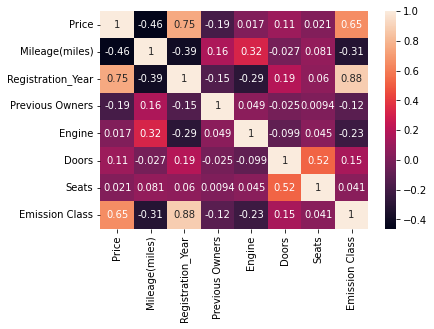

In [62]:
# 등록연과 가격, 배출량과 가격, 등록연과 배출량이 상관관계가 높다.
# 좌석수와 문수도 상관관계가 높다. 하나의 컬럼으로 줄이거나 삭제가 가능해보인다.
sns.heatmap(data = car_df.corr(), annot=True)

In [63]:
# one-hot encoding 후의 값의 상관관계
oh_car_df.corr()

,Price,Mileage(miles),Registration_Year,Previous Owners,Engine,Doors,Seats,Emission Class,Fuel type_Diesel Hybrid,Fuel type_Electric,...,country_Germany,country_Italy,country_Japan,country_Malaysia,country_Romania,country_South Korea,country_Spain,country_Sweden,country_United Kingdom,country_United States
Price,1.000000,-0.460854,0.749493,-0.188818,0.016820,0.109318,0.020815,0.654808,0.081694,0.045601,...,0.143989,-0.044158,-0.071433,-0.025782,0.036079,0.041235,-0.004104,-0.037868,0.005756,-0.078028
Mileage(miles),-0.460854,1.000000,-0.393637,0.164679,0.318634,-0.026559,0.080789,-0.314723,-0.022541,-0.041201,...,0.175703,-0.065418,0.041690,-0.008734,-0.078831,-0.073841,-0.011334,0.077309,-0.077546,0.007654
Registration_Year,0.749493,-0.393637,1.000000,-0.151998,-0.293662,0.194869,0.060485,0.883886,0.035960,0.050175,...,-0.077800,0.005736,-0.118502,-0.014504,0.085345,0.089819,0.020440,-0.048895,0.089660,-0.018204
Previous Owners,-0.188818,0.164679,-0.151998,1.000000,0.048845,-0.024598,0.009381,-0.123769,-0.009147,-0.033562,...,0.025387,-0.016875,0.008153,-0.020168,-0.017876,-0.015459,-0.013923,-0.001482,-0.002725,0.007268
Engine,0.016820,0.318634,-0.293662,0.048845,1.000000,-0.098689,0.044970,-0.232102,0.013021,-0.103946,...,0.343433,-0.095114,-0.027708,-0.022891,-0.057762,-0.086448,-0.048797,0.067163,-0.028467,-0.080885
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
country_South Korea,0.041235,-0.073841,0.089819,-0.015459,-0.086448,0.098187,0.020838,0.052612,-0.004326,-0.007496,...,-0.129409,-0.045626,-0.100439,-0.006119,-0.016225,1.000000,-0.029582,-0.027204,-0.112672,-0.085954
country_Spain,-0.004104,-0.011334,0.020440,-0.013923,-0.048797,-0.023159,0.024502,0.001338,-0.002446,-0.004239,...,-0.073175,-0.025799,-0.056794,-0.003460,-0.009175,-0.029582,1.000000,-0.015382,-0.063711,-0.048604
country_Sweden,-0.037868,0.077309,-0.048895,-0.001482,0.067163,-0.005531,0.006900,-0.054346,-0.002250,-0.003898,...,-0.067292,-0.023725,-0.052228,-0.003182,-0.008437,-0.027204,-0.015382,1.000000,-0.058589,-0.044696
country_United Kingdom,0.005756,-0.077546,0.089660,-0.002725,-0.028467,-0.039483,-0.002256,0.079062,-0.009318,0.011414,...,-0.278713,-0.098266,-0.216319,-0.013180,-0.034945,-0.112672,-0.063711,-0.058589,1.000000,-0.185123


In [64]:
# Robust Scaler와 MinMax Scaler도 적용하여 몇 개의 PCA로 줄일 수 있는지 확인
rs = RobustScaler()

In [65]:
rs_car_df = pd.DataFrame(rs.fit_transform(oh_car_df), columns=oh_car_df.columns)

In [66]:
pca=PCA(8)
pca.fit_transform(rs_car_df)
pca.explained_variance_ratio_.sum()

0.7102482484755255

In [67]:
mm = MinMaxScaler()
mm_car_df = pd.DataFrame(mm.fit_transform(oh_car_df), columns=oh_car_df.columns)

In [68]:
pca=PCA(11)
pca.fit_transform(mm_car_df)
pca.explained_variance_ratio_.sum()

0.7025684668225929

* Robust Scaler는 8개, MinMaxScaler는 11개의 주성분 추출을 진행하면 70% 이상의 특징을 반영하는 컬럼을 만들 수 있다.


* 데이터가 one-hot encoding의 영향을 받은 컬럼이 많아 정규분포를 따르지 않는 경향이 강하므로 Robust Scaler의 성능이 가장 좋다.


* PCA 이후 컬럼들의 값은 우리가 분석할 수 없는, 특정 로직이 적용되어 있으므로 어떤 PCA feature가 어떤 영향을 미쳤는지 분석이 불가하다.

#### 회고

* 중고차 가격 예측 모델을 위한 데이터 전처리 관점에서 작업을 진행해보았다.


* 머신러닝 모델을 적용시켜 구현하는 일련의 과정을 정확하게 배워서 데이터의 전처리와 feature engineering의 효과가 어떤 식으로 적용되는지 비교 분석을 해봤으면 좋겠다.


* 데이터를 다룰 때 생각보다 많은 부분을 고려해야 하고 디테일하게 들어가면 끝없이 이어질 수도 있다는 것도 알게 됐다.


* 데이터 사이언스를 택한 이유가 결국 전체 전처리 과정의 중요성을 공부하면 할수록 깨달았기 때문인데, 더 많은 데이터셋을 가지고 전처리를 해보는 연습을 해야 할 것 같다.


* 데이터를 다루는 개개인의 아이디어가 전부 다르므로 그의 결과물 또한 전부 다를 수 있고, 어떤 관점에서는 어떤 결과가, 다른 관점에서는 다른 결과가 맞을 수 있다는 사실을 항상 염두에 두어야 한다.


* standard scaler는 정규분포를 따르는 경우 성능이 가장 좋고 정규분포를 따르지 않는 데이터셋의 경우 성능이 잘 나오지 않아 위험하며 연속적인 데이터 분포에 활용될 수 있다.


* 일반적으로 MinMax Scaler를 많이 활용한다. Robust Scaler는 quantile값을 활용하고, 이산적인 값들을 처리하는 데 상대적으로 유리할 수 있다.


* brand title의 one-hot 처리 때문에 컬럼 수가 많이 늘어난 car_df 데이터프레임에는 robust가 오히려 좋은 성능을 내는 것을 볼 수 있다.


* standard scaler와 robust scaler의 차이점 중 이상치에 대한 부분은 정규분포 곡선상의 이상치를 말하는 것임을 알 수 있었다.